In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
data_file = "../../evolutionary-poker/output/run/lineage_history/lineage_history.csv"

data = pd.read_csv(data_file)

In [13]:
player = data.loc[data['fitness'].idxmax()]
print(player)

trait = [col for col in data.columns if col.startswith('trait_')]
trait_values = {col[6:]: player[col] for col in trait}
# trait_values

lineage                       80f60ba5-4fb
generation                   generation_99
id                                fd5032a5
fitness                           0.949975
lineage_fitness                   1.299952
lineage_avg_fitness               0.081707
rounds_lasted                       206523
table_position                         5.0
trait_aggressiveness              0.880392
trait_risk_tolerance              0.451753
trait_bluff_tendency              0.263154
trait_adaptability                0.713414
trait_position_awareness          0.979588
trait_chip_size_awareness         0.040181
action_fold                              0
action_check                             0
action_call                         822873
action_raise                        823612
action_all_in                            0
action_bluff                             0
Name: 4774, dtype: object


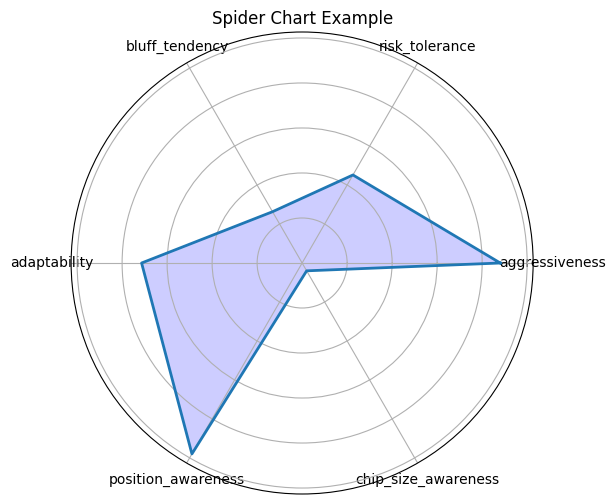

In [30]:
# Number of variables
num_vars = len(trait_values.keys())
values = list(trait_values.values())
labels = list(trait_values.keys())
# Compute angle for each trait
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot close to a circle
values += values[:1]
angles += angles[:1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data
line, = ax.plot(angles, values, linewidth=2, linestyle='solid', label='Trait Comparison')
fill = ax.fill(angles, values, 'b', alpha=0.1)

# Fill the area inside the chart
ax.fill(angles, values, 'b', alpha=0.1)

# Set the labels
ax.set_yticklabels([])  # Hide radial axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Title
plt.title('Spider Chart Example')

# Show the plot
plt.show()

In [4]:
full_player_history = data[data['id'] == player['id']]

/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_66544/1623112140.py:55: UserWarning: frames=<generator object frame_sequence at 0x1288c6b20> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=frame_sequence(), interval=max_interval, blit=True)


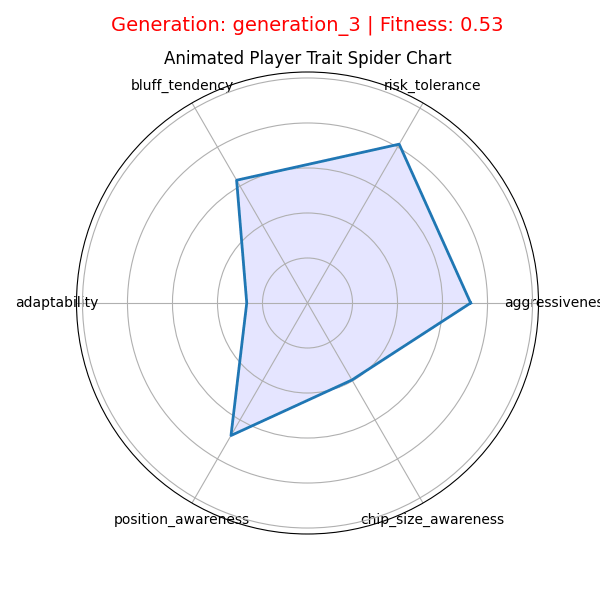

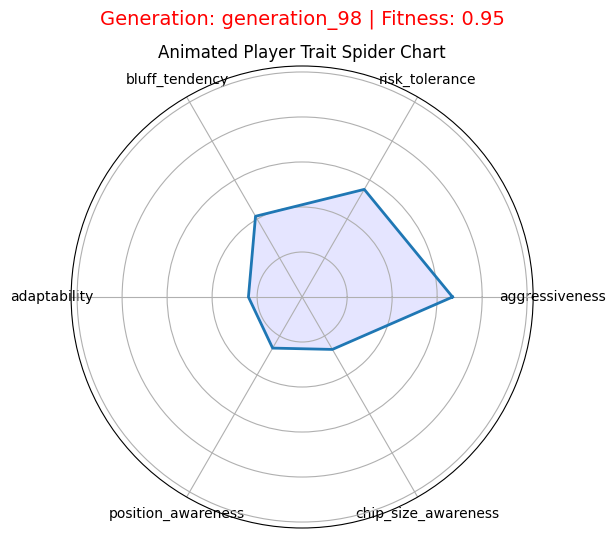

In [14]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Number of variables
num_vars = len(trait_values.keys())
values = list(trait_values.values())
labels = list(trait_values.keys())
# Compute angle for each trait
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot close to a circle
values += values[:1]
angles += angles[:1]

text = ax.text(
    0.5, 1.1,
    f"Generation: {full_player_history.iloc[0]['generation']} | Fitness: {full_player_history.iloc[0]['fitness']:.2f}",
    transform=ax.transAxes, ha='center', va='center', fontsize=14, color='red'
)

line, = ax.plot(angles, values, linewidth=2, linestyle='solid', label='Trait Comparison')
fill = ax.fill(angles, values, 'b', alpha=0.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Animated Player Trait Spider Chart')

# Calculate the maximum interval
total_duration = 120  # Total duration of the animation in seconds
max_interval = total_duration * 1000 // len(full_player_history)  # Convert seconds to milliseconds

def update(frame):
    if frame >= len(full_player_history):
        return [line] + fill + [text]
    player_row = full_player_history.iloc[frame]
    trait_values_frame = [player_row[col] for col in trait]
    trait_values_frame += trait_values_frame[:1]
    line.set_ydata(trait_values_frame)
    fill[0].set_xy(np.column_stack([angles, trait_values_frame]))
    # Update fitness and generation text
    text.set_text(
        f"Generation: {player_row['generation']} | Fitness: {player_row['fitness']:.2f}"
    )
    return [line] + fill + [text]

end_delay_frames = 30

def frame_sequence():
    for i in range(len(full_player_history)):
        yield i
    last = len(full_player_history) - 1
    for _ in range(end_delay_frames):
        yield last

# Create the animation
ani = FuncAnimation(fig, update, frames=frame_sequence(), interval=max_interval, blit=True)
# Display the animation in the Jupyter Notebook
from IPython.display import Image
ani.save("player_trait_animation.gif", writer="pillow")
Image(filename="player_trait_animation.gif")
